# Import Librairies:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"
import warnings
warnings.filterwarnings("ignore")

In [2]:
print (plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Scraping Data using API:

In [3]:
from fredapi import Fred
with open('your fred api key', 'r') as file:
    fred_key = file.read().strip()

In [4]:
f=Fred(api_key=fred_key)

# S&P 500 (Standard & Poor's 500):

The **S&P 500 (Standard & Poor's 500)** is an index that tracks the performance of 500 of the largest publicly traded companies in the United States. It's used to measure the overall health of the stock market and the economy. When people say "the market is up" or "the market is down," they often refer to the S&P 500.

In [5]:
sp_search=f.search('S&P',order_by='popularity')
sp_search.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-11-24,2024-11-24,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:51:14-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-11-24,2024-11-24,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-11-24,2024-11-24,S&P 500,2014-11-24,2024-11-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-22 19:11:30-06:00,83,The observations for the S&P 500 represent the...


In [6]:
sp_search.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [7]:
spdf=f.get_series(series_id='SP500')
spdf

2014-11-24    2069.41
2014-11-25    2067.03
2014-11-26    2072.83
2014-11-27        NaN
2014-11-28    2067.56
               ...   
2024-11-18    5893.62
2024-11-19    5916.98
2024-11-20    5917.11
2024-11-21    5948.71
2024-11-22    5969.34
Length: 2610, dtype: float64

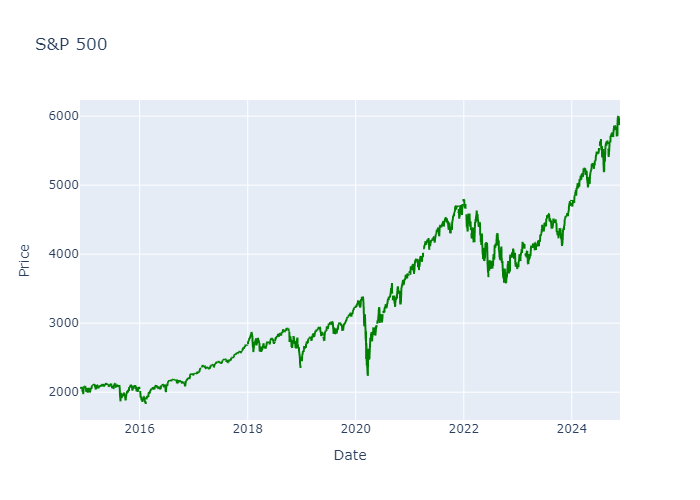

In [8]:
fig= px.line(spdf, x=spdf.index,y=spdf.values,title='S&P 500',labels={'index':'Date','y':'Price'})
fig.update_traces(line=dict(color="green", width=2))
fig.show()

In [9]:
spdf.describe(include='all').to_frame(name='S&P500 Price')\
    .T\
    .round(2)

,count,mean,std,min,25%,50%,75%,max
S&P500 Price,2517.0,3316.34,1058.39,1829.08,2399.38,2979.39,4179.83,6001.35


In [10]:
# Define mean and standard deviation
mean = 3308.63
std = 1053.44

# Calculate Coefficient of Variation (CV)
cv = std / mean

# Express CV as a percentage
cv_percentage = cv * 100

# Print the results
print("Coefficient of Variation (CV):", cv)
print("Coefficient of Variation (CV) as a percentage:", cv_percentage, "%")

Coefficient of Variation (CV): 0.31839160014870205
Coefficient of Variation (CV) as a percentage: 31.839160014870206 %


A CV of **30% for the S&P 500** suggests that the market is experiencing moderate volatility relative to its average returns. While this is not an extraordinarily high level of risk, it indicates a level of uncertainty that investors should be aware of. Depending on the investor's risk tolerance, a CV of 30% might be viewed as a sign of moderate risk in the market, and it would typically be considered acceptable for long-term investors in equity markets.

# Unemployement Rate:

The **unemployment rate** is a measure of the percentage of people in the labor force who are actively seeking employment but are unable to find work. It is calculated by dividing the number of unemployed individuals by the total labor force (which includes both the employed and unemployed) and then multiplying by 100.

Here's the formula:
#### Unemployment Rate = (Number of Unemployed People/Labor Force)* 100


A high unemployment rate can indicate economic distress, while a low unemployment rate often suggests a strong economy with plenty of job opportunities.

In [11]:
unempdf=f.search('unemployement rate state',filter=('frequency','Monthly'))
unempdf=unempdf.query('units=="Percent"and seasonal_adjustment=="Seasonally Adjusted" ')
unempdf.sample(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LNS14027659,LNS14027659,2024-11-24,2024-11-24,Unemployment Rate - Less Than a High School Di...,1992-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:46:16-05:00,29,The series comes from the 'Current Population ...
KYUR,KYUR,2024-11-24,2024-11-24,Unemployment Rate in Kentucky,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:13-06:00,20,None
LBSSA54,LBSSA54,2024-11-24,2024-11-24,Labor Force Participation Rate for West Virginia,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-19 09:01:09-06:00,16,A state's labor-force participation rate is th...
LBSSA42,LBSSA42,2024-11-24,2024-11-24,Labor Force Participation Rate for Pennsylvania,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-19 09:01:07-06:00,17,A state's labor-force participation rate is th...
LBSSA34,LBSSA34,2024-11-24,2024-11-24,Labor Force Participation Rate for New Jersey,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-19 09:01:08-06:00,13,A state's labor-force participation rate is th...


In [12]:
unempdf.shape

(158, 15)

In [13]:
unempdf.isna().sum()

id                            0
realtime_start                0
realtime_end                  0
title                         0
observation_start             0
observation_end               0
frequency                     0
frequency_short               0
units                         0
units_short                   0
seasonal_adjustment           0
seasonal_adjustment_short     0
last_updated                  0
popularity                    0
notes                        59
dtype: int64

In [14]:
#Only select rows that have states in them.
unempdf1=unempdf[unempdf['notes'].isna()]
unempdf1.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-11-24,2024-11-24,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
TXUR,TXUR,2024-11-24,2024-11-24,Unemployment Rate in Texas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:03-06:00,56,None
NYUR,NYUR,2024-11-24,2024-11-24,Unemployment Rate in New York,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,53,None
FLUR,FLUR,2024-11-24,2024-11-24,Unemployment Rate in Florida,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,51,None
PAUR,PAUR,2024-11-24,2024-11-24,Unemployment Rate in Pennsylvania,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:04-06:00,44,None


In [15]:
unempdf1.shape

(59, 15)

In [16]:
unempdf1['title']=unempdf1['title'].str.replace('Unemployment Rate in','')
unempdf1.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-11-24,2024-11-24,California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
TXUR,TXUR,2024-11-24,2024-11-24,Texas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:03-06:00,56,None
NYUR,NYUR,2024-11-24,2024-11-24,New York,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,53,None
FLUR,FLUR,2024-11-24,2024-11-24,Florida,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,51,None
PAUR,PAUR,2024-11-24,2024-11-24,Pennsylvania,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:04-06:00,44,None


##  Pull and Join Multiple Unemployement Data Series

In [17]:
all_results=[]
for i in unempdf1.index:
    results=f.get_series(i)
    results=results.to_frame(name=i)
    all_results.append(results)

In [18]:
unemp=pd.concat(all_results,axis=1)
unemp.head(3)

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,...,KSUR,WYUR,DEUR,VTUR,SDUR,CMWRUR,CSOUUR,CNERUR,CWSTUR,CNEWUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6


In [19]:
#change columns names:
unemp_state=unemp.copy()
idstate=unempdf1['title'].to_dict()
unemp_state.rename(columns=idstate,inplace=True)
unemp_state.head(3)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Kansas,Wyoming,Delaware,Vermont,South Dakota,Midwest Census Region,South Census Region,Northeast Census Region,West Census Region,New England Census Division
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,4.2,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6


In [20]:
# delete non state columns:
nonstate0=[ ' Cleveland-Elyria, OH (MSA)',' Detroit-Warren-Dearborn, MI (MSA)',' Midwest Census Region',' Missouri', ' New England Census Division',' Northeast Census Region',' Puerto Rico',' South Census Region',' West Census Region',]
unempstate= unemp_state.drop(nonstate0,axis=1)
unempstate.shape

(586, 50)

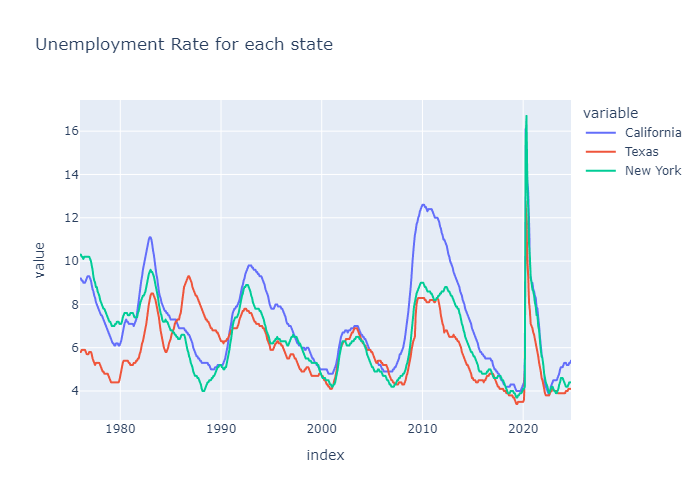

In [38]:
#Visualize Unemployement Data:
px.line(unemp_state.iloc[:,0:3],title='Unemployment Rate for each state')

# Pull Septembre 2024 Unemployement Rate Per State:

In [22]:
a = unemp_state.loc[unemp_state.index == '2024-09-01'].T \
    .sort_values('2024-09-01')
a.head()

,2024-09-01
South Dakota,2.0
Vermont,2.2
North Dakota,2.3
New Hampshire,2.5
Nebraska,2.7


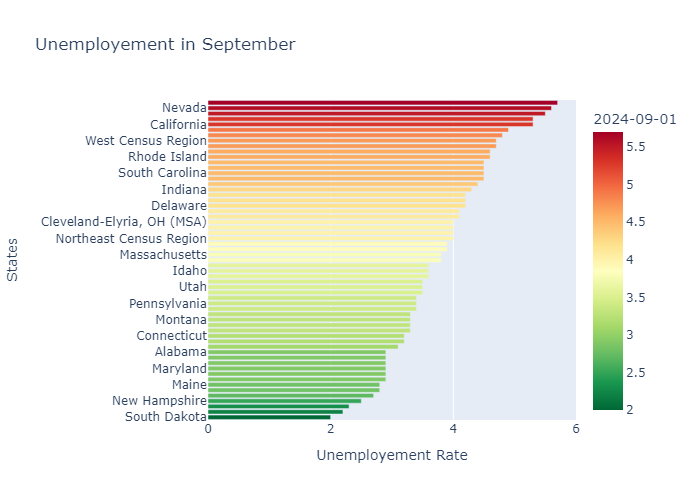

In [35]:
fig2=px.bar(a,
            orientation='h',
            color="2024-09-01",
            color_continuous_scale="RdYlGn_r",
            title='Unemployement in September',
            labels={'index':'States','value':'Unemployement Rate'}
           )
fig.update_traces(marker=dict(line=dict(color="black", width=0.5),opacity=0.8))

fig2.show()

# Participation Rate:

The **participation rate** is the percentage of people who are either working or actively looking for work out of the total working-age population. It shows how many people are involved in the labor force compared to those who are eligible to work but may not be actively participating.

In [24]:
partdf=f.search("participation rate state",filter=('frequency','Monthly'))
partdf=partdf.query('units=="Percent" and seasonal_adjustment=="Seasonally Adjusted"')
partdf.head(3)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-11-24,2024-11-24,Labor Force Participation Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-11-24,2024-11-24,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:07-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-11-24,2024-11-24,Labor Force Participation Rate - Women,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:11-05:00,66,To obtain estimates of women worker employment...


In [25]:
partdf.shape

(109, 15)

In [26]:
#change columns names:
partst=partdf['title'].str.replace('Labor Force Participation Rate for',"").to_dict()
nonstate=['CIVPART','LNS11300060','LNS11300002','LNS11300001','LNS11324230','LNS11300012','LNS11300006','LRAC25MAUSM156S','LNS11300036','LRAC25FEUSM156S','LNS11327662','LNS11300028','LNS11300031','LNS11300003' ,'LNS11327660','LNS11300029','LNS11300009','LNS11300032','LNS11327659', 'LNS11300026','LBSSA29','LRIN64TTUSM156S','LRAC64TTUSM156S','LNS11327689','LRAC55TTUSM156S', 'LNS11300025','LNS11327689','LNS11300015','LNS11300018','LRAC24TTUSM156S','LRAC74TTUSM156S','LRIN25MAUSM156S','LRACTTFEUSM156S','LRAC25TTUSM156S','LRACTTTTUSM156S','LRACTTMAUSM156S','LRAC55MAUSM156S','LRAC64FEUSM156S','LRAC55FEUSM156S','LRAC24MAUSM156S','LRAC74FEUSM156S','LRAC24FEUSM156S','LRAC64MAUSM156S','LRAC74MAUSM156S','LRINTTTTUSM156S','LRINTTMAUSM156S','LRINTTFEUSM156S','LRIN55TTUSM156S','LRIN74TTUSM156S','LRIN24TTUSM156S','LRIN25TTUSM156S','LRIN55MAUSM156S','LRIN24MAUSM156S','LRIN24FEUSM156S','LRIN74FEUSM156S','LRIN74MAUSM156S','LRIN64MAUSM156S','LRIN64FEUSM156S','LRIN55FEUSM156S','LRIN25FEUSM156S']
# get series for each states:
all_results=[]
for i in partdf.index:
    results=f.get_series(i)
    results=results.to_frame(name=i)
    all_results.append(results)
# concatenate all states series:
partstates=pd.concat(all_results,axis=1).drop(nonstate,axis=1)
#show numbers of state (50):
partstates.shape

(922, 50)

In [27]:
# rename columns:
part=partstates.rename(columns=partst)
# delete nan values:
part.dropna(inplace=True)
part.head(3)

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,...,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7


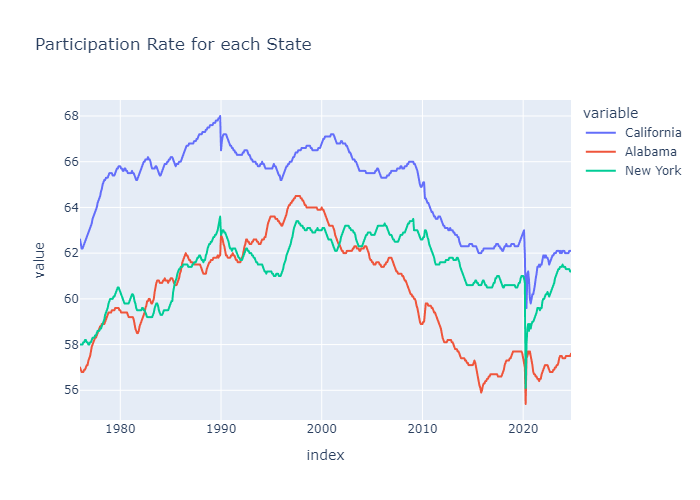

In [39]:
#visualize Participation Rate for each State:
px.line(part.iloc[:,0:3],title='Participation Rate for each State')

# Pull Septembre 2024 Participation Rate Per State:

In [29]:
part_sep=part.loc['2024-09-01'].to_frame(name='Septembre')\
      .sort_values('Septembre',ascending=False)
part_sep.head()


,Septembre
District Of Columbia,72.0
North Dakota,68.8
Utah,68.4
Nebraska,68.3
Colorado,67.9


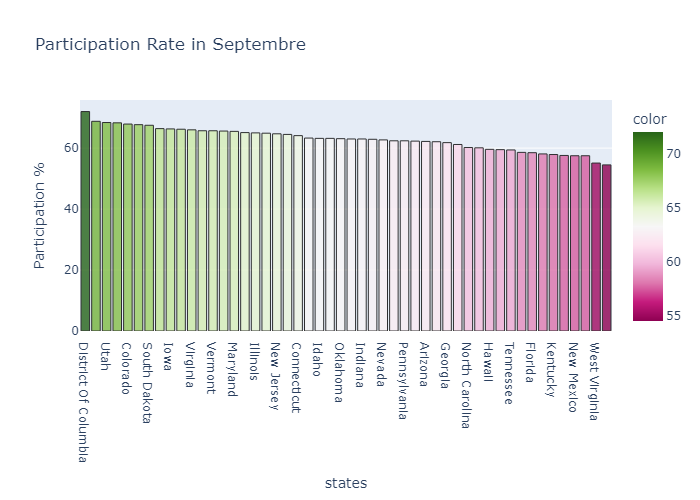

In [30]:
fig1=px.bar(part_sep,
          title='Participation Rate in Septembre',
          labels={'value':'Participation %','index':'states'},
          color=part_sep.iloc[:,0],
          color_continuous_scale='PiYG')
fig1.update_traces(marker=dict(line=dict(color='black',width=1),opacity=0.8))
fig1.show()